In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data10 = pd.read_csv('all_tiles_sample10.csv')

In [3]:
print(data10.head())

       v1      v2      v3      v4      v5      v6      v7      v8      v9  \
0  0.0986  0.0827  0.0983  0.0908  0.1559  0.3373  0.3918  0.3858  0.4048   
1  0.1299  0.1380  0.1954  0.1780  0.2159  0.3256  0.3602  0.3536  0.3685   
2  0.0351  0.0485  0.0764  0.0605  0.1199  0.3018  0.3505  0.3400  0.3722   
3  0.0427  0.0489  0.0583  0.0406  0.0928  0.2288  0.2770  0.2976  0.2883   
4  0.0955  0.1316  0.1252  0.0839  0.1311  0.2874  0.3625  0.3607  0.3864   

      v10  ...     v18     v19     v20     v21     v22     v23     v24  \
0  0.4002  ...  0.0415  0.1107  0.2857  0.3296  0.3439  0.3555  0.3050   
1  0.4905  ...  0.0969  0.1352  0.2755  0.3255  0.3255  0.3586  0.3314   
2  0.3642  ...  0.0596  0.1238  0.2718  0.3374  0.3383  0.3334  0.3419   
3  0.2737  ...  0.0480  0.1197  0.3170  0.3686  0.3550  0.3772  0.3385   
4  0.3921  ...  0.0529  0.1166  0.3058  0.3688  0.3596  0.4048  0.3540   

      v25     v26  v27  
0  0.2120  0.1151    0  
1  0.2679  0.1750    0  
2  0.2208  0.1251

In [4]:
print(data10.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247791 entries, 0 to 247790
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   v1      247791 non-null  float64
 1   v2      247791 non-null  float64
 2   v3      247791 non-null  float64
 3   v4      247791 non-null  float64
 4   v5      247791 non-null  float64
 5   v6      247791 non-null  float64
 6   v7      247791 non-null  float64
 7   v8      247791 non-null  float64
 8   v9      247791 non-null  float64
 9   v10     247791 non-null  float64
 10  v11     247791 non-null  float64
 11  v12     247791 non-null  float64
 12  v13     247791 non-null  int64  
 13  class   247791 non-null  int64  
 14  v15     247791 non-null  float64
 15  v16     247791 non-null  float64
 16  v17     247791 non-null  float64
 17  v18     247791 non-null  float64
 18  v19     247791 non-null  float64
 19  v20     247791 non-null  float64
 20  v21     247791 non-null  float64
 21  v22     24

In [5]:
X = data10.drop('class', axis=1)
y = data10['class']

In [6]:
y_onehot = pd.get_dummies(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=1000)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (198232, 26)
y_train shape: (198232, 8)
X_test shape: (49559, 26)
y_test shape: (49559, 8)


In [10]:
model10 = Sequential()
model10.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model10.add(Dense(16, activation='relu'))
model10.add(Dense(8, activation='softmax'))

In [11]:
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history10 = model10.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


4956/4956 [==============================] - 13s 2ms/step - loss: 0.7213 - accuracy: 0.8043 - val_loss: 0.6764 - val_accuracy: 0.8088
Epoch 2/10
4956/4956 [==============================] - 14s 3ms/step - loss: 0.6701 - accuracy: 0.8082 - val_loss: 0.6560 - val_accuracy: 0.8095
Epoch 3/10
4956/4956 [==============================] - 10s 2ms/step - loss: 0.6548 - accuracy: 0.8096 - val_loss: 0.6481 - val_accuracy: 0.8110
Epoch 4/10
4956/4956 [==============================] - 11s 2ms/step - loss: 0.6456 - accuracy: 0.8107 - val_loss: 0.6404 - val_accuracy: 0.8122
Epoch 5/10
4956/4956 [==============================] - 11s 2ms/step - loss: 0.6387 - accuracy: 0.8116 - val_loss: 0.6462 - val_accuracy: 0.8130
Epoch 6/10
4956/4956 [==============================] - 11s 2ms/step - loss: 0.6334 - accuracy: 0.8124 - val_loss: 0.6292 - val_accuracy: 0.8132
Epoch 7/10
4956/4956 [==============================] - 11s 2ms/step - loss: 0.6294 - accuracy: 0.8132 - val_loss: 0.6334 - val

In [13]:
loss, accuracy = model10.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1549/1549 [==============================] - 3s 2ms/step - loss: 0.6176 - accuracy: 0.8147
Loss: 0.6175883412361145
Accuracy: 0.8146653771400452


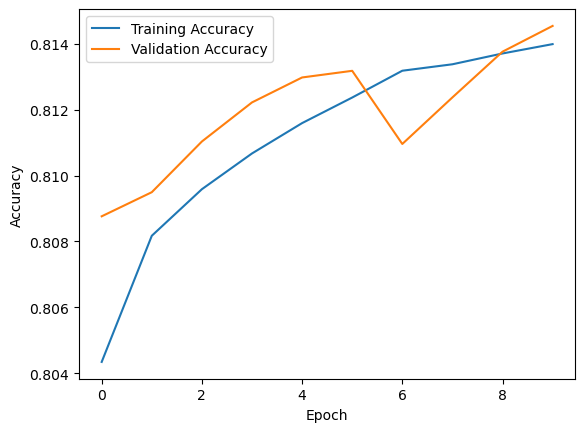

In [14]:
plt.plot(history10.history['accuracy'], label='Training Accuracy')
plt.plot(history10.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
y_pred = model10.predict(X_test)

1549/1549 [==============================] - 2s 2ms/step


In [16]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test.values, axis=1)

In [17]:
report = classification_report(y_true_labels, y_pred_labels)

C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     39990
           1       0.49      0.18      0.27      5093
           2       0.54      0.01      0.02      1874
           3       0.76      0.09      0.16       299
           4       0.00      0.00      0.00      1276
           5       0.00      0.00      0.00       415
           6       0.00      0.00      0.00       451
           7       0.33      0.06      0.10       161

    accuracy                           0.81     49559
   macro avg       0.37      0.17      0.18     49559
weighted avg       0.74      0.81      0.76     49559



In [20]:
y_true_labels_list = y_true_labels.tolist()
unique_classes, counts = np.unique(y_true_labels_list, return_counts=True)
total_samples = len(y_true_labels_list)

class_weights = total_samples / (len(unique_classes) * counts)
class_weight_dict = dict(zip(unique_classes, class_weights))

In [21]:
model10_ft = Sequential()
model10_ft.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model10_ft.add(Dropout(0.5))
model10_ft.add(Dense(16, activation='relu'))
model10_ft.add(Dropout(0.5))
model10_ft.add(Dense(8, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model10_ft.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history10_ft = model10_ft.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/10
4956/4956 [==============================] - 14s 3ms/step - loss: 2.1502 - accuracy: 0.0537 - val_loss: 2.1061 - val_accuracy: 0.0268
Epoch 2/10
4956/4956 [==============================] - 13s 3ms/step - loss: 2.1049 - accuracy: 0.0728 - val_loss: 2.1105 - val_accuracy: 0.1058
Epoch 3/10
4956/4956 [==============================] - 16s 3ms/step - loss: 2.0941 - accuracy: 0.0962 - val_loss: 2.0599 - val_accuracy: 0.1042
Epoch 4/10
4956/4956 [==============================] - 13s 3ms/step - loss: 2.0846 - accuracy: 0.1158 - val_loss: 2.0634 - val_accuracy: 0.1298
Epoch 5/10
4956/4956 [==============================] - 13s 3ms/step - loss: 2.0780 - accuracy: 0.1206 - val_loss: 2.0022 - val_accuracy: 0.1602
Epoch 6/10
4956/4956 [==============================] - 12s 3ms/step - loss: 2.0622 - accuracy: 0.1164 - val_loss: 2.0532 - val_accuracy: 0.1399
Epoch 7/10
4956/4956 [==============================] - 12s 2ms/step - loss: 2.0537 - accuracy: 0.1105 - val_loss: 2.0427 - val_ac

In [22]:
loss, accuracy = model10_ft.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1549/1549 [==============================] - 2s 2ms/step - loss: 2.0196 - accuracy: 0.1622
Loss: 2.019622802734375
Accuracy: 0.16217033565044403


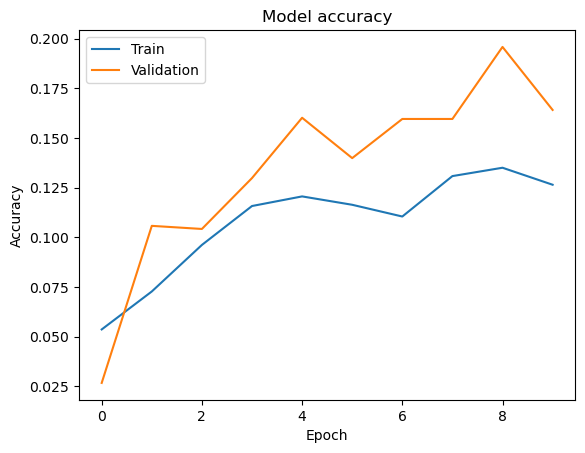

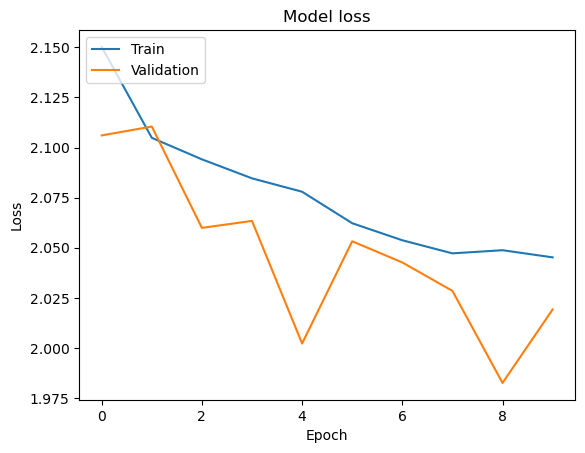

In [23]:
plt.plot(history10_ft.history['accuracy'])
plt.plot(history10_ft.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history10_ft.history['loss'])
plt.plot(history10_ft.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
y_pred = model10_ft.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(np.array(y_test), axis=1)
report = classification_report(y_test_labels, y_pred_labels)
print(report)

1549/1549 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.18      0.30     39990
           1       0.00      0.00      0.00      5093
           2       0.09      0.08      0.09      1874
           3       0.03      0.35      0.05       299
           4       0.00      0.00      0.00      1276
           5       0.02      0.59      0.04       415
           6       0.02      0.43      0.04       451
           7       0.01      0.66      0.01       161

    accuracy                           0.16     49559
   macro avg       0.14      0.29      0.07     49559
weighted avg       0.76      0.16      0.25     49559

